In [2]:
from datetime import datetime, date
import numpy as np
import backtrader as bt
import quantstats as qs
import pyfolio
import matplotlib
import pandas as pd


In [3]:
# assumptions
api_key = "FCKwjHdhEA4rnMXk4ykY"

train_start = datetime(2015, 1, 1)
train_end = datetime(2020, 6, 1)
test_start = datetime(2018, 1, 1)
test_end = datetime(2020, 6, 1)

cash = 1000000 # 1Mx
broker_fee = 0.0

In [4]:
# create cerebro instance

cerebro = bt.Cerebro()

In [5]:
# add all available assets to backtrader

# # pull all available tickers from quandl WIKI DB
# tickers_df = pd.read_csv('../wiki_tickers.csv')

# # data filter
# tickers_df = tickers_df.sample(30)

# tickers = tickers_df["ticker"].tolist()

tickers = ['AAPL', 'XOM', 'TSLA'] # debuggin purposes
print(f"{len(tickers)} tickers available!")

for ticker in tickers:
    temp = bt.feeds.Quandl(
        dataname=ticker,
        fromdate=train_start,
        todate=train_end,
        apikey=api_key
    )

    cerebro.adddata(temp)
    print(f"Added {ticker}!")

print(f"{len(tickers)} time-series added to Cerebro engine!")

3 tickers available!
Added AAPL!
Added XOM!
Added TSLA!
3 time-series added to Cerebro engine!


In [13]:
tickers_df = pd.read_csv('../wiki_tickers.csv')

tickers_df.loc[tickers_df.ticker == "ARKK", ["ticker"]]

,ticker


In [ ]:
class Strategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.data = self.datas[0]
        # sef.sma50 = self.observer()

    def next(self):
        pass
        # print(f"pricing: {self.data}")
        
        # Simply log the closing price of the series from the reference
        # self.log(f'Close, {self.dataclose[0]}')


In [6]:
class BuyAndHold(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def start(self):
        self.val_start = self.broker.get_cash()  # keep the starting cash

    def nextstart(self):
        # Buy all the available cash
        disp_cash = int(self.broker.get_cash() / len(self.datas))

        # buy equal parts of for each stock
        for i, data in enumerate(self.datas):
            number_of_stocks = int(disp_cash / self.datas[i].open[0])
            self.buy(self.datas[i], size=number_of_stocks)
            self.log(f"buying {number_of_stocks} of {data._name} @ {self.datas[i].open[0]}")

    def stop(self):
        # calculate the actual returns
        pv = self.val_start
        fv = self.broker.get_value()
        self.roi = (fv / pv) - 1.0
        print(f'ROI:{100 * self.roi}%')

In [7]:
# broker
cerebro.broker.setcash(cash)
cerebro.broker.setcommission(commission=broker_fee)

# analyzers
cerebro.addanalyzer(bt.analyzers.PyFolio)
cerebro.addanalyzer(bt.analyzers.SQN)
cerebro.addanalyzer(bt.analyzers.VWR)

# strategies
cerebro.addstrategy(BuyAndHold)

0

2015-01-02, buying 3149 of AAPL @ 105.82096585573
2015-01-02, buying 4018 of XOM @ 82.950621828702
2015-01-02, buying 1495 of TSLA @ 222.87
ROI:26.61410799014494%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.82,2015-07-20,2016-02-10,2017-02-08,408
1,13.41,2018-01-23,2018-03-27,NaT,NaN
2,9.53,2017-06-08,2017-07-06,2017-08-08,44
3,8.45,2015-02-20,2015-03-27,2015-04-27,47
4,5.96,2017-09-18,2017-11-02,2018-01-08,81


Top 10 long positions of all time,max
TSLA,96.23%


Top 10 short positions of all time,max


Top 10 positions of all time,max
TSLA,96.23%


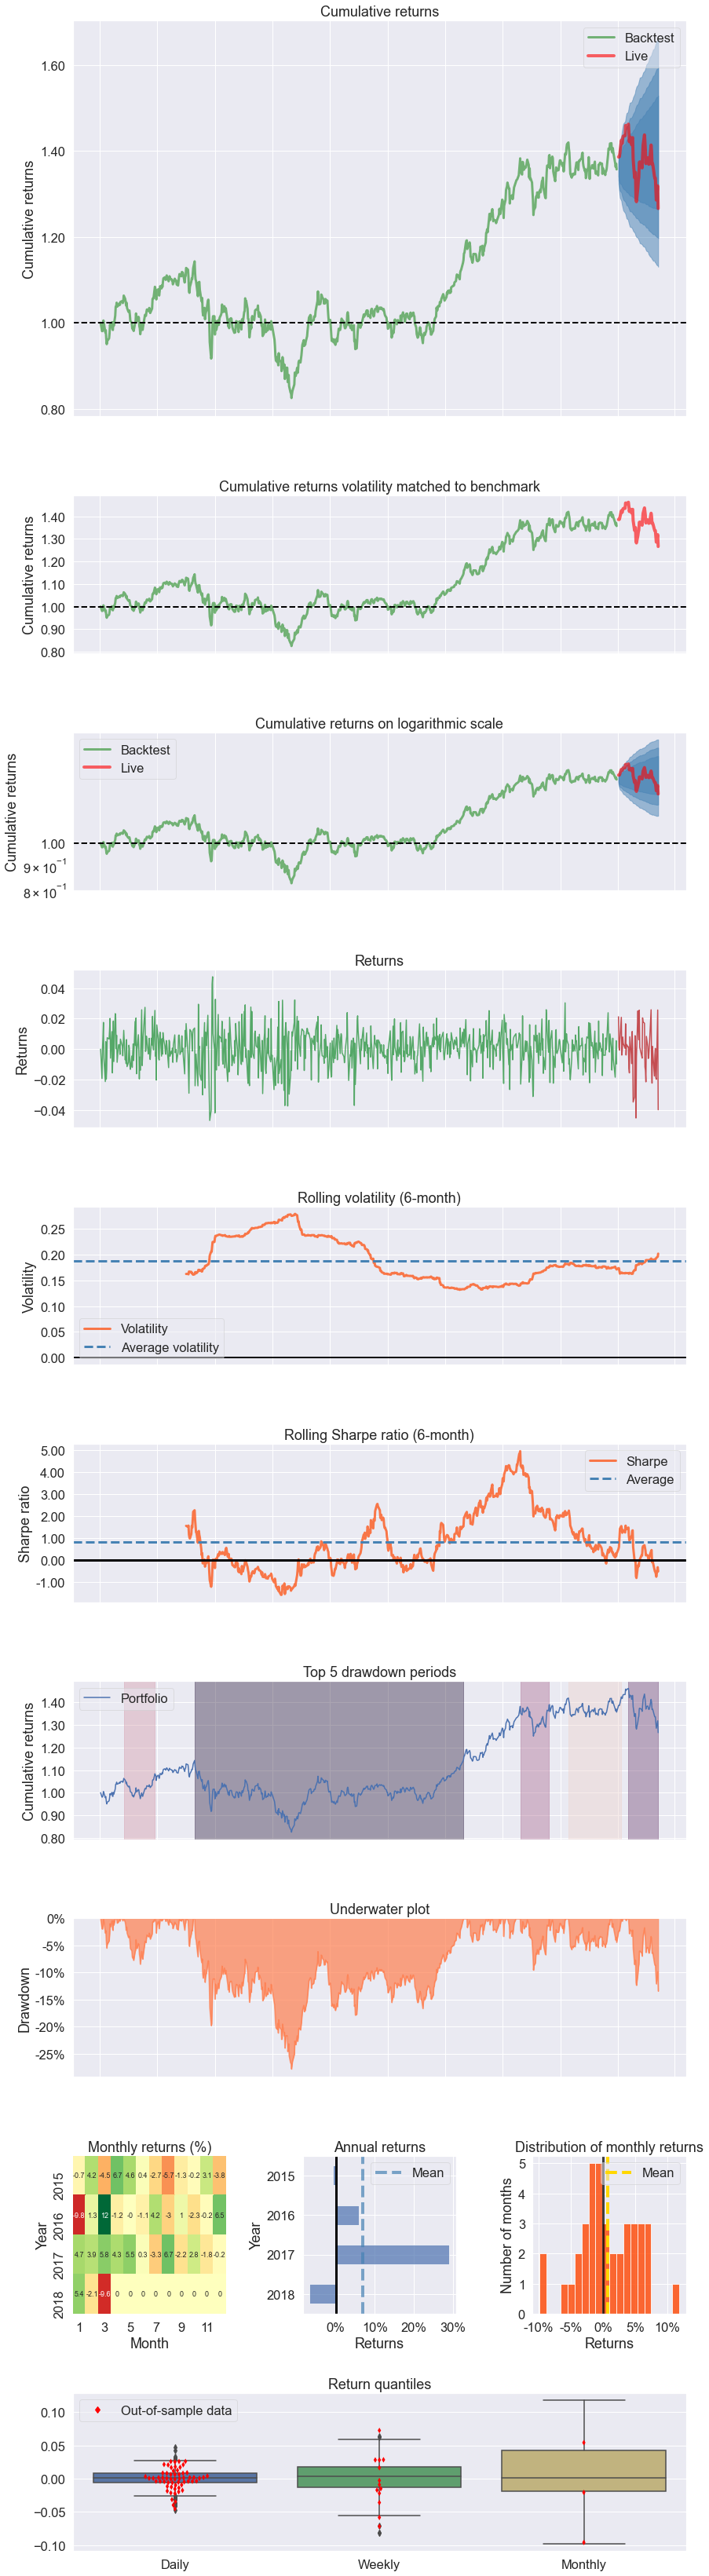

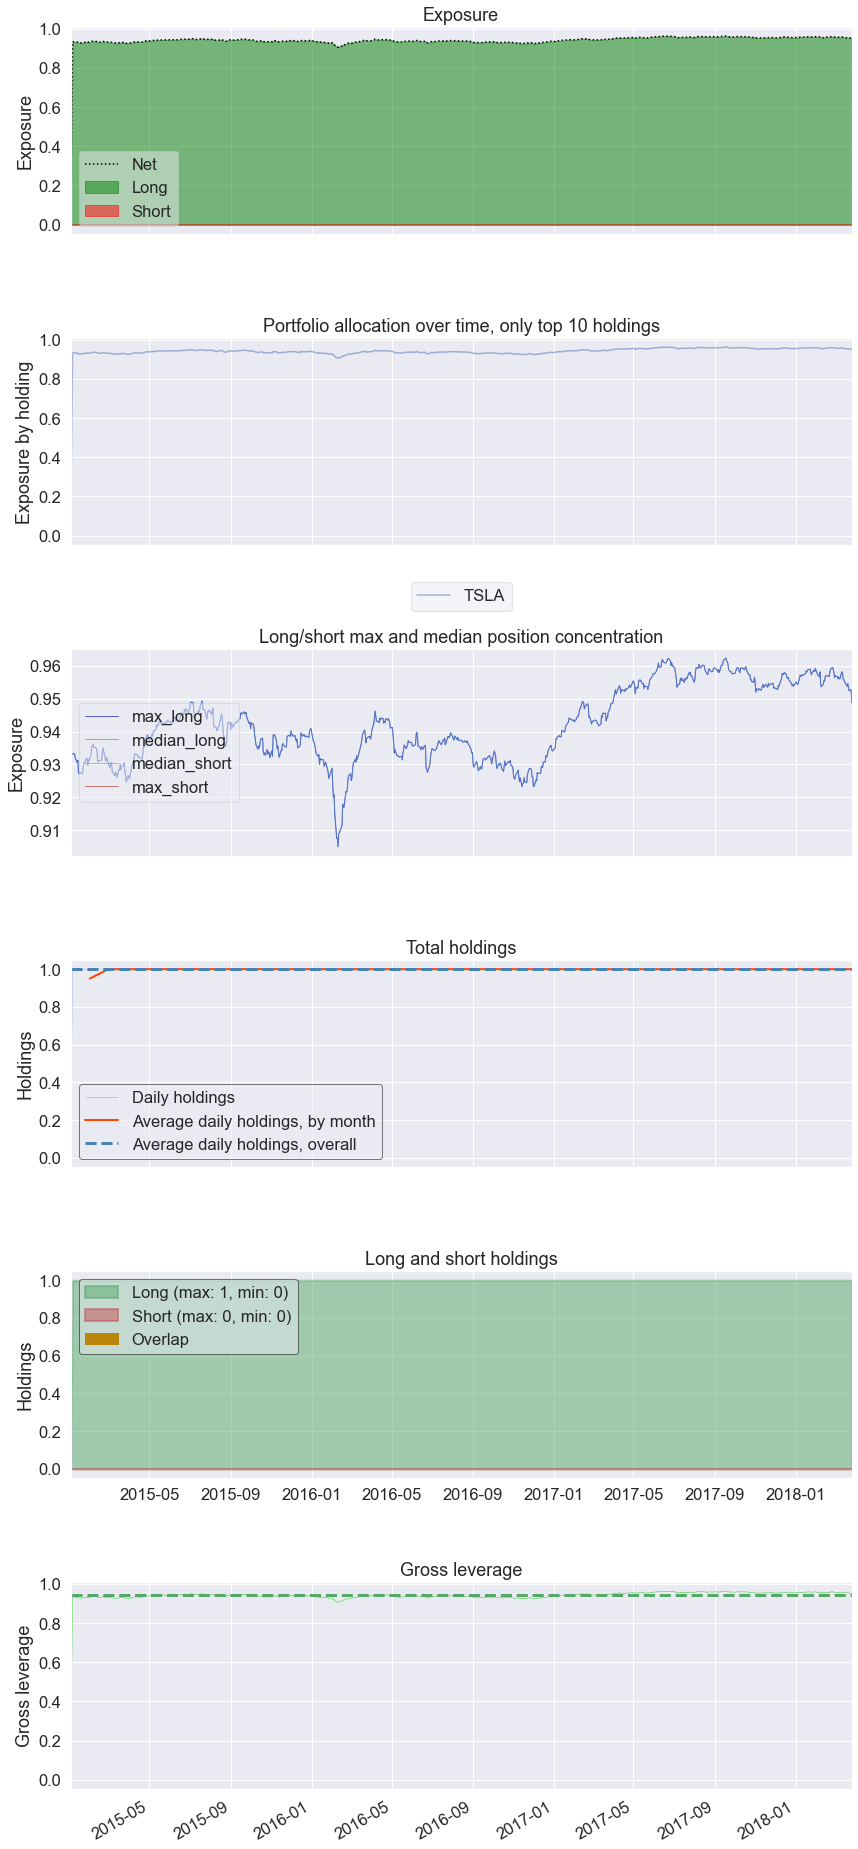

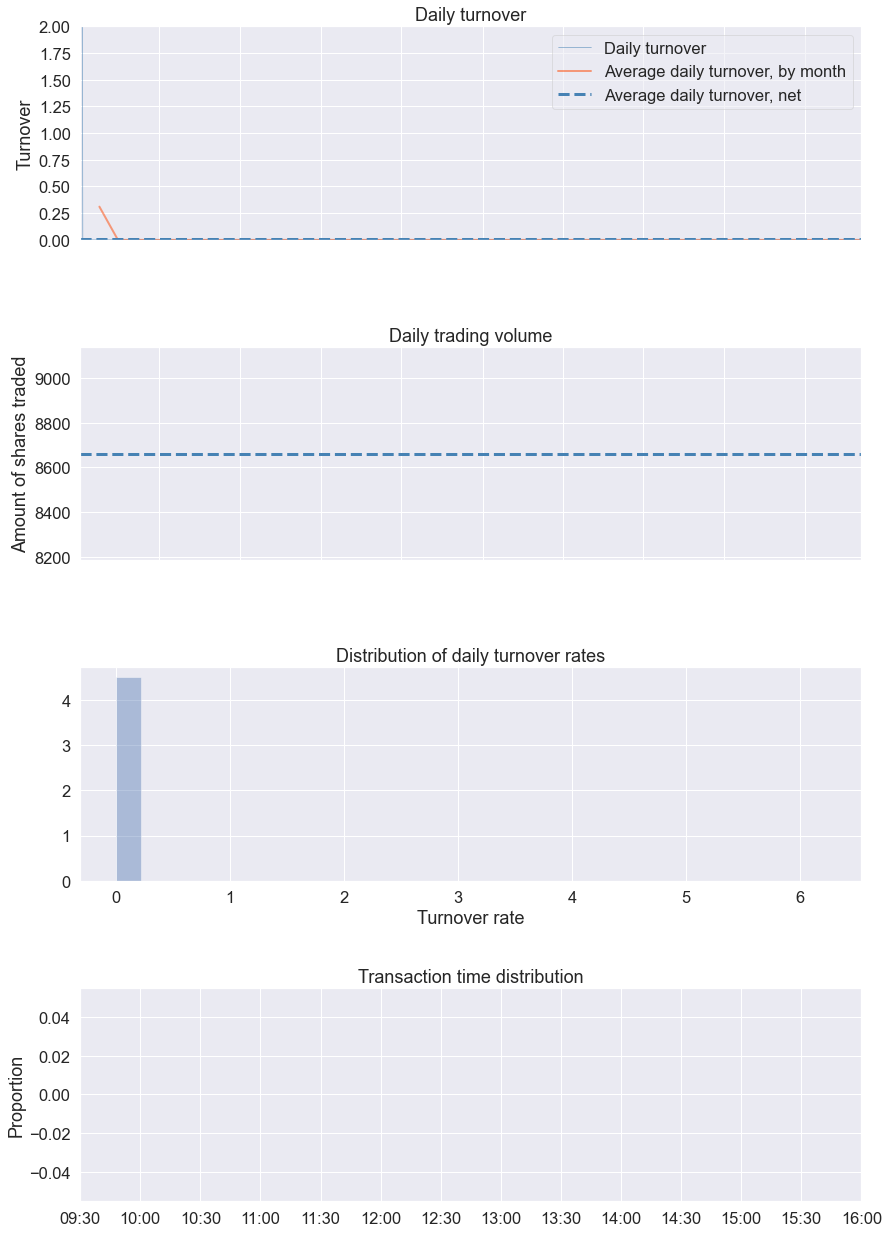

In [8]:
results = cerebro.run()

strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()

pyfolio.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    live_start_date=test_start,  # This date is sample specific
    benchmark_rets=None,
    round_trips=False
)

[[<Figure size 432x288 with 8 Axes>]]

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/jorgesmacbookpro/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/Users/jorgesmacbookpro/anaconda3/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/Users/jorgesmacbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/Users/jorgesmacbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/jorgesmacbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/Users/jorgesmacbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done

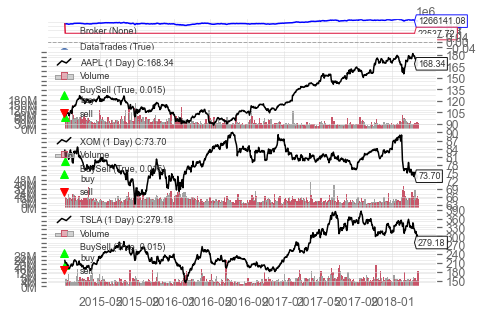

In [9]:
%matplotlib inline
cerebro.plot(iplot=False)

In [10]:
%matplotlib inline
# fetch the daily returns for a stock
stock = qs.utils.download_returns('SPY', period="")
# qs.reports.full(stock, "SPY")
stock

Date
1993-01-29         NaN
1993-02-01    0.007257
1993-02-02    0.002275
1993-02-03    0.010594
1993-02-04    0.004118
                ...   
2020-09-14    0.013171
2020-09-15    0.005052
2020-09-16   -0.003969
2020-09-17   -0.008795
2020-09-18   -0.010243
Name: Close, Length: 6961, dtype: float64

In [ ]:
returns.tail()

In [ ]:
data = quandl.get("WIKI/AAPL", rows=5)
data

In [ ]:
import matplotlib.pyplot as mpl
import scipy.cluster.hierarchy as sch,random,numpy as np,pandas as pd

In [ ]:
# Compute the inverse-variance portfolio
def getIVP(cov,**kargs):
    ivp=1./np.diag(cov) ivp/=ivp.sum()
    return ivp

In [ ]:
def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_ = cov.loc[cItems,cItems] # matrix slice
    w_ = getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

In [ ]:
# Sort clustered items by distance
def getQuasiDiag(link):
    link=link.astype(int)
    sortIx=pd.Series([link[-1,0],link[-1,1]])
    numItems=link[-1,3] # number of original items
    while sortIx.max()>= numItems:
        sortIx.index = range(0,sortIx.shape[0]*2,2) # make space
        df0 = sortIx[sortIx>=numItems] # find clusters
        i = df0.index;j=df0.values-numItems
        sortIx[i] = link[j,0] # item 1

        df0 = pd.Series(link[j,1],index=i+1)
        sortIx = sortIx.append(df0) # item 2
        sortIx = sortIx.sort_index() # re-sort
        sortIx.index = range(sortIx.shape[0]) # re-index
    return sortIx.tolist()

In [ ]:
# Compute HRP alloc
def getRecBipart(cov,sortIx):
    w=pd.Series(1,index=sortIx)
    cItems=[sortIx] # initialize all items in one cluster 
    while len(cItems)>0:
        cItems=[i[j:k] for i in cItems for j,k in ((0,len(i)/2), (len(i)/2,len(i))) if len(i)>1] # bi-section
        for i in xrange(0,len(cItems),2): # parse in pairs
            cItems0=cItems[i] # cluster 1
            cItems1=cItems[i+1] # cluster 2
            cVar0=getClusterVar(cov,cItems0)
            cVar1=getClusterVar(cov,cItems1)
            alpha=1-cVar0/(cVar0+cVar1)
            w[cItems0]*=alpha # weight 1
            w[cItems1]*=1-alpha # weight 2
    return w

In [ ]:
def correlDist(corr):
# A distance matrix based on correlation, where 0<=d[i,j]<=1 # This is a proper distance metric
dist=((1-corr)/2.)**.5 # distance matrix
return dist

In [ ]:
def plotCorrMatrix(path,corr,labels=None): # Heatmap of the correlation matrix
    if labels is None:
        labels=[]
    mpl.pcolor(corr)
    mpl.colorbar()
    mpl.yticks(np.arange(.5,corr.shape[0]+.5),labels)
    mpl.xticks(np.arange(.5,corr.shape[0]+.5),labels)
    mpl.savefig(path)
    mpl.clf();mpl.close() # reset pylab
    return

In [ ]:
# Time series of correlated variables
def generateData(nObs,size0,size1,sigma1):
    #1) generating some uncorrelated data
    np.random.seed(seed=12345);random.seed(12345)
    x=np.random.normal(0,1,size=(nObs,size0))
    # each row is a variable
    # 2) creating correlation between the variables
    cols=[random.randint(0,size0–1) for i in xrange(size1)]
    y=x[:,cols]+np.random.normal(0,sigma1,size=(nObs,len(cols)))
    x=np.append(x,y,axis=1)
    x=pd.DataFrame(x,columns=range(1,x.shape[1]+1))
    return x,cols

In [ ]:
def main():
    #1) Generate correlated data
    nObs,size0,size1,sigma1=10000,5,5,.25 x,cols=generateData(nObs,size0,size1,sigma1)
    print [(j+1,size0+i) for i,j in enumerate(cols,1)] cov,corr=x.cov(),x.corr()
    #2) compute and plot correl matrix
    plotCorrMatrix('HRP3_corr0.png',corr,labels=corr.columns)
    #3) cluster
    dist=correlDist(corr)
    link=sch.linkage(dist,'single')
    sortIx=getQuasiDiag(link)
    sortIx=corr.index[sortIx].tolist() # recover labels
    df0=corr.loc[sortIx,sortIx] # reorder
    plotCorrMatrix('HRP3_corr1.png',df0,labels=df0.columns) #4) Capital allocation
    hrp=getRecBipart(cov,sortIx)
    print hrp
    return